# Whose face is it anyway?! 🤔
__________________________________
### Keira Knightley vs. Johnny Depp (because the error rate was huge with Natalie Portman)

Inspired by fast.ai Deep Learning Part I Certificate Course

Note to self: Press <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>C</kbd> on Mac for javascript console

In [1]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'KK'
file = 'urls_kk.txt'

In [2]:
folder = 'JD'
file = 'urls_jd.txt'

*run once per category

In [3]:
path = Path('data/faces')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#### Download images

In [4]:
classes = ['KK','JD']

In [ ]:
download_images(path/file, dest, max_pics=200)

#### remove any images that can't be opened:

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

KK


JD


#### View data

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['JD', 'KK']

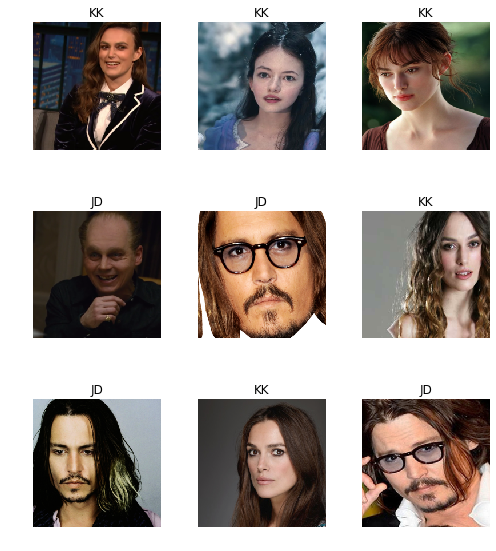

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['JD', 'KK'], 2, 148, 36)

## Train

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate
1,0.755531,0.731576,0.444444
2,0.616294,0.393848,0.138889
3,0.468424,0.337441,0.111111
4,0.370162,0.344046,0.083333
5,0.320740,0.344635,0.083333
6,0.276588,0.344070,0.055556


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


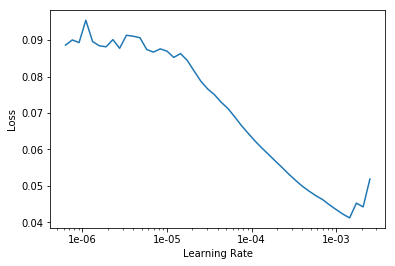

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.122982,0.343440,0.055556
2,0.068594,0.359162,0.083333


In [17]:
learn.save('stage-2')

## Confusion Matrix

In [18]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

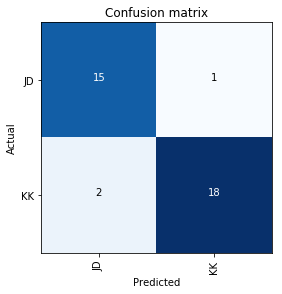

In [20]:
interp.plot_confusion_matrix()

## Prediction

In [21]:
import fastai
fastai.defaults.device = torch.device('cpu')

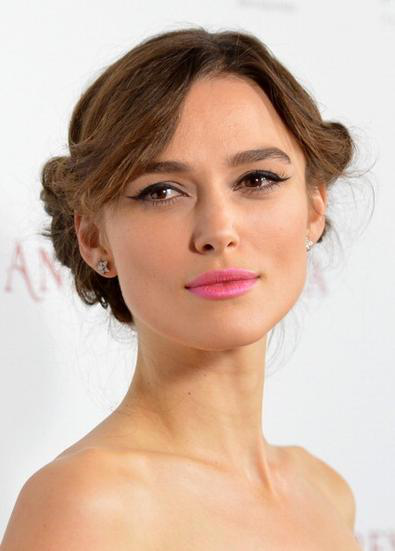

In [41]:
img = open_image(path/'KK'/'00000099.jpg')
img

In [46]:
classes = ['JD', 'KK']

In [47]:
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [48]:
learn = create_cnn(data2, models.resnet34).load('stage-2')

In [49]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category KK

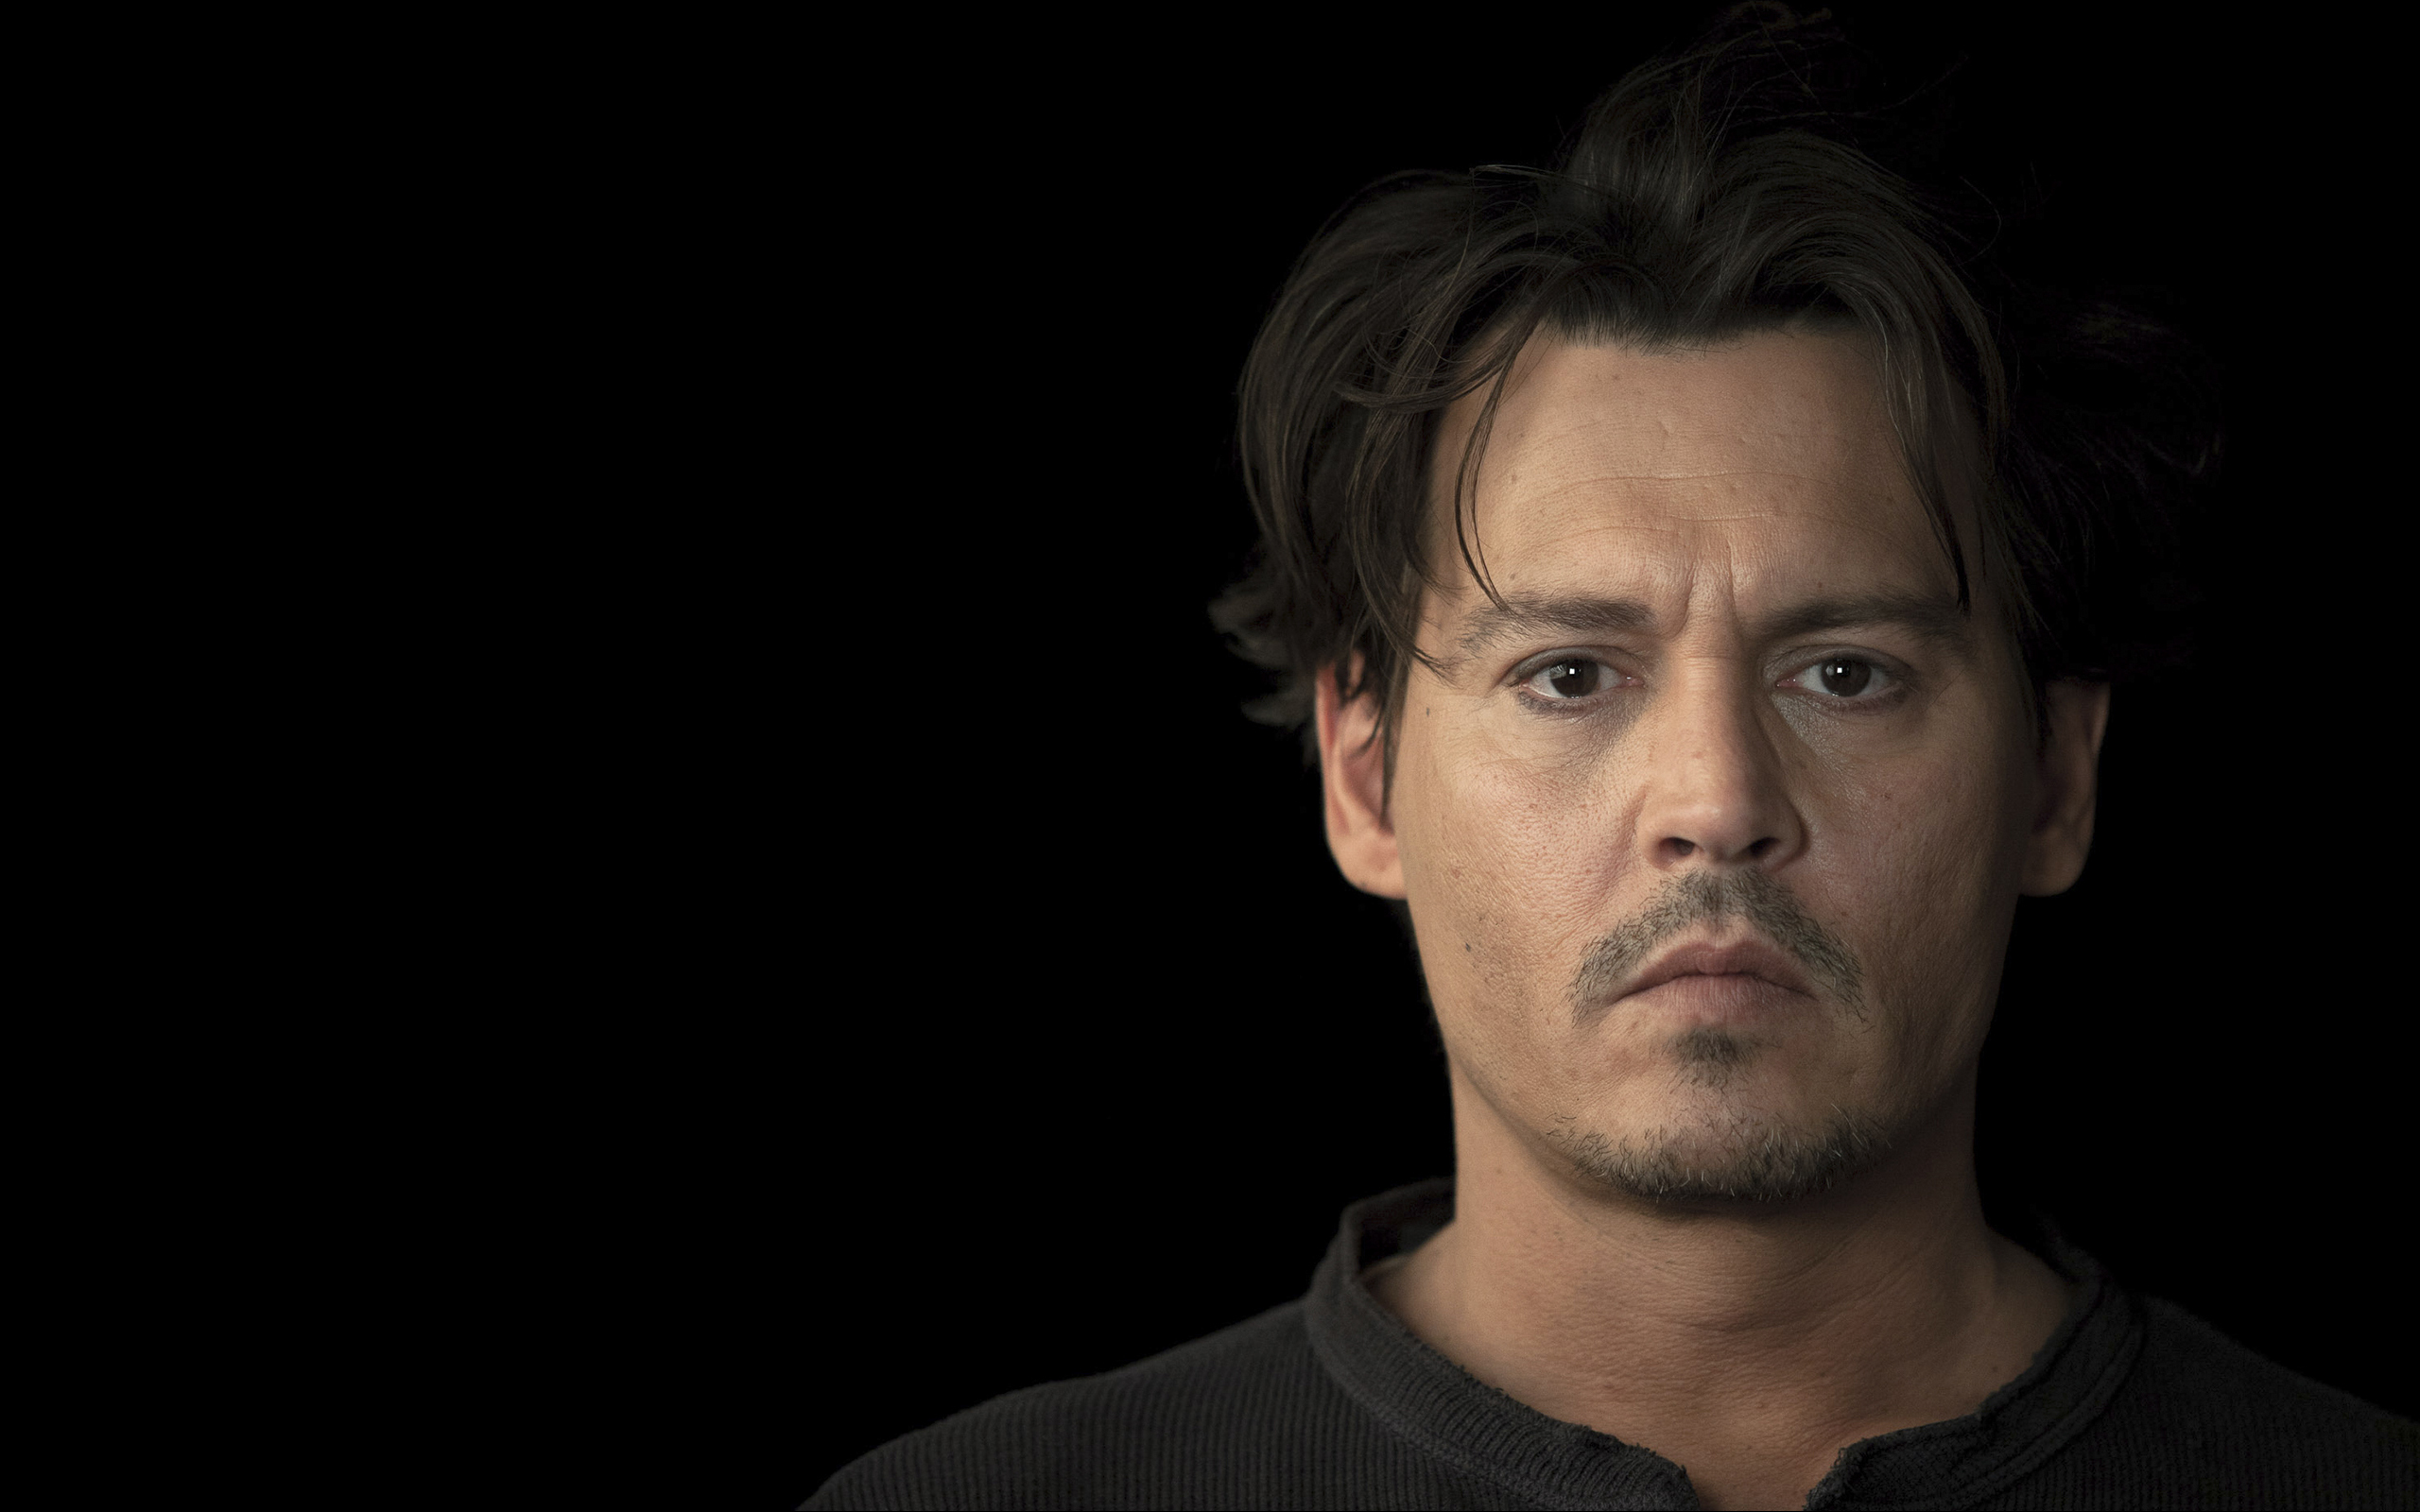

In [50]:
img = open_image(path/'JD'/'00000025.jpg')
img

In [51]:
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [52]:
learn = create_cnn(data2, models.resnet34).load('stage-2')
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category JD